In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

import re  
import nltk  #natural lng tool kit
from nltk.corpus import stopwords    #corpus- complte review
from nltk.tokenize import sent_tokenize,word_tokenize  #it will split sentence by sentence word by word
from nltk.stem import WordNetLemmatizer  # it will give meaning root word with dctionary
from nltk.sentiment.vader import SentimentIntensityAnalyzer#Sentument -some word negtive some postive word in dic 
from wordcloud import WordCloud

nltk.download("punkt")  #need for tokenzation ..abbrebation read adj etc
nltk.download("stopwords") #is am are and but a an the
nltk.download('vader_lexicon')  #categorize postive and negative words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
pip install assemblyai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#convert speech into text
import assemblyai as aai

aai.settings.api_key = "31a7cd1705444aafaeadba64f2e78bd0"
audio_url="PM.mp4"
config=aai.TranscriptionConfig(language_code="hi")
transcriber = aai.Transcriber(config=config)
transcript=transcriber.transcribe(audio_url)

In [ ]:
#save the speech text 
with open ("PMSPEECH.txt","w",encoding="utf-8") as f:
    f.write(transcript.text)

In [8]:
#open and read speech text file 
file_path = "PMSPEECH.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech_textH = file.read()

In [9]:
speech_textH

'सियावर। रामचंद्र की जय। सियावर रामचंद्र की जय। श्रद्धे मंच, सभी संत एवं रशिगणयहाँ, उपस्थित, और विश्व के कोने। कोने में। हम सब से जुड़े हुए। सभी राम भक्त। आप, सबको प्रणाम, आप। सबको राम। राम। आज हमारे राम आ गए हैं। सदियों की प्रतिक्षा के बाद हमारे राम आ गए हैं। सदियों का अभूतपूर्व, धैर्य, अनगिनत, बलिदान, त्याग, और तपस्या के बाद हमारे प्रभु राम आ गए है। इस शुभ गड़ी की। आप सभी को, समस्त। देशवासियों को। बहुत बहुत बधाई। मैं। अभी, गर्भ, ग्रह में ईश्वरीय, चेतना का साक्षी बनकर। आपके सामने उपस्थित हुआ हूँ कितना कुछ कहने? को है? लेकिन कंठ? अवरुद्ध है? मेरा शरीर? अभी है। चित भी उस पल में लीन है। हमारे रामलला। अब टेंट में नहीं रहेंगे। हमारे रामलला अभी, दिव्य, मंदिर में रहेंगे। मेरा पक्का विश्वास है। अपार श्रद्धा है कि जो गठित हुआ है, इसकी अनुभूति देश के, विश्व के कोने, कोने में, राम भक्तों को हो रही होगी। ये अलौकिक है। ये पल। पवित्रतम है। ये माहौल, ये वातावरण, ये ऊर्जा, ये घडी, प्रभु। श्री राम का। हम सब पर आशीर्वाद है। 22 जनवरी, 2024 का ये सूरज 1 अद्भुत आभा लेकर आया है। 22 जनवरी, 2024। यह कैलेंडर? प

In [154]:

from gtts import gTTS
language="en"
text=speech_textH #"hello world my name is raghav and i am trying to genrate audio from text"
speech=gTTS(text=text,lang=language,slow=False,tld="co.in")
speech.save("textToSpeechh.mp3")

In [133]:
#each and every word splited, ''s is not splited only,apostraphe s
from nltk.tokenize import word_tokenize #convert para into words,  comma also seprate word 
word3=word_tokenize(speech_textH)
word3

['सियावर।',
 'रामचंद्र',
 'की',
 'जय।',
 'सियावर',
 'रामचंद्र',
 'की',
 'जय।',
 'श्रद्धे',
 'मंच',
 ',',
 'सभी',
 'संत',
 'एवं',
 'रशिगणयहाँ',
 ',',
 'उपस्थित',
 ',',
 'और',
 'विश्व',
 'के',
 'कोने।',
 'कोने',
 'में।',
 'हम',
 'सब',
 'से',
 'जुड़े',
 'हुए।',
 'सभी',
 'राम',
 'भक्त।',
 'आप',
 ',',
 'सबको',
 'प्रणाम',
 ',',
 'आप।',
 'सबको',
 'राम।',
 'राम।',
 'आज',
 'हमारे',
 'राम',
 'आ',
 'गए',
 'हैं।',
 'सदियों',
 'की',
 'प्रतिक्षा',
 'के',
 'बाद',
 'हमारे',
 'राम',
 'आ',
 'गए',
 'हैं।',
 'सदियों',
 'का',
 'अभूतपूर्व',
 ',',
 'धैर्य',
 ',',
 'अनगिनत',
 ',',
 'बलिदान',
 ',',
 'त्याग',
 ',',
 'और',
 'तपस्या',
 'के',
 'बाद',
 'हमारे',
 'प्रभु',
 'राम',
 'आ',
 'गए',
 'है।',
 'इस',
 'शुभ',
 'गड़ी',
 'की।',
 'आप',
 'सभी',
 'को',
 ',',
 'समस्त।',
 'देशवासियों',
 'को।',
 'बहुत',
 'बहुत',
 'बधाई।',
 'मैं।',
 'अभी',
 ',',
 'गर्भ',
 ',',
 'ग्रह',
 'में',
 'ईश्वरीय',
 ',',
 'चेतना',
 'का',
 'साक्षी',
 'बनकर।',
 'आपके',
 'सामने',
 'उपस्थित',
 'हुआ',
 'हूँ',
 'कितना',
 'कुछ',
 'कहने',
 '?',
 'को',
 'ह

In [153]:
pip install gtts

In [134]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
sentences6=nltk.sent_tokenize(pm_speech)
sentences6

['सियावर। रामचंद्र की जय। सियावर रामचंद्र की जय। श्रद्धे मंच, सभी संत एवं रशिगणयहाँ, उपस्थित, और विश्व के कोने। कोने में। हम सब से जुड़े हुए। सभी राम भक्त। आप, सबको प्रणाम, आप। सबको राम। राम। आज हमारे राम आ गए हैं। सदियों की प्रतिक्षा के बाद हमारे राम आ गए हैं। सदियों का अभूतपूर्व, धैर्य, अनगिनत, बलिदान, त्याग, और तपस्या के बाद हमारे प्रभु राम आ गए है। इस शुभ गड़ी की। आप सभी को, समस्त। देशवासियों को। बहुत बहुत बधाई। मैं। अभी, गर्भ, ग्रह में ईश्वरीय, चेतना का साक्षी बनकर। आपके सामने उपस्थित हुआ हूँ कितना कुछ कहने?',
 'को है?',
 'लेकिन कंठ?',
 'अवरुद्ध है?',
 'मेरा शरीर?',
 'अभी है। चित भी उस पल में लीन है। हमारे रामलला। अब टेंट में नहीं रहेंगे। हमारे रामलला अभी, दिव्य, मंदिर में रहेंगे। मेरा पक्का विश्वास है। अपार श्रद्धा है कि जो गठित हुआ है, इसकी अनुभूति देश के, विश्व के कोने, कोने में, राम भक्तों को हो रही होगी। ये अलौकिक है। ये पल। पवित्रतम है। ये माहौल, ये वातावरण, ये ऊर्जा, ये घडी, प्रभु। श्री राम का। हम सब पर आशीर्वाद है। 22 जनवरी, 2024 का ये सूरज 1 अद्भुत आभा लेकर आया है। 22 जनवरी

In [135]:
for i in range(len(sentences6)):
    wordsq=nltk.word_tokenize(sentences6[i])  #need each and every words
    print(wordsq)

['सियावर।', 'रामचंद्र', 'की', 'जय।', 'सियावर', 'रामचंद्र', 'की', 'जय।', 'श्रद्धे', 'मंच', ',', 'सभी', 'संत', 'एवं', 'रशिगणयहाँ', ',', 'उपस्थित', ',', 'और', 'विश्व', 'के', 'कोने।', 'कोने', 'में।', 'हम', 'सब', 'से', 'जुड़े', 'हुए।', 'सभी', 'राम', 'भक्त।', 'आप', ',', 'सबको', 'प्रणाम', ',', 'आप।', 'सबको', 'राम।', 'राम।', 'आज', 'हमारे', 'राम', 'आ', 'गए', 'हैं।', 'सदियों', 'की', 'प्रतिक्षा', 'के', 'बाद', 'हमारे', 'राम', 'आ', 'गए', 'हैं।', 'सदियों', 'का', 'अभूतपूर्व', ',', 'धैर्य', ',', 'अनगिनत', ',', 'बलिदान', ',', 'त्याग', ',', 'और', 'तपस्या', 'के', 'बाद', 'हमारे', 'प्रभु', 'राम', 'आ', 'गए', 'है।', 'इस', 'शुभ', 'गड़ी', 'की।', 'आप', 'सभी', 'को', ',', 'समस्त।', 'देशवासियों', 'को।', 'बहुत', 'बहुत', 'बधाई।', 'मैं।', 'अभी', ',', 'गर्भ', ',', 'ग्रह', 'में', 'ईश्वरीय', ',', 'चेतना', 'का', 'साक्षी', 'बनकर।', 'आपके', 'सामने', 'उपस्थित', 'हुआ', 'हूँ', 'कितना', 'कुछ', 'कहने', '?']
['को', 'है', '?']
['लेकिन', 'कंठ', '?']
['अवरुद्ध', 'है', '?']
['मेरा', 'शरीर', '?']
['अभी', 'है।', 'चित', 'भी', 'उस', 'पल',

In [138]:
sd=pd.value_counts(np.array(word3))
pd.set_option('display.max_rows', None)
print(sd)

,                  210
राम                 95
है।                 89
के                  88
?                   83
का                  74
की                  72
से                  55
में                 52
को                  40
है                  39
भारत                38
और                  37
ये                  31
आज                  30
भी                  29
हैं।                25
तो                  21
हम                  20
नहीं                20
देश                 20
मंदिर               20
इस                  18
हो                  16
राष्ट्र             15
प्रभु               14
ही                  14
हमारे               14
मैं                 14
समय                 14
पर                  14
यही                 12
लिए                 12
हमें                11
अब                  11
कि                  11
सब                  11
1                   11
काल                 11
सभी                 10
पल                  10
कर                   9
रहे                  9
भव्य       

In [ ]:
#CONVERT Hindi to english than open file english file

file_path = "PMspeechenglish.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()

In [7]:
speech_text

"Siyavar. Glory to Ramchandra. Jai Siyavar Ramchandra. Shraddha Manch, all the saints and sages present here, and in every corner of the world. In the corner. We are all connected. All Ram devotees. Salutations to you all, you. Ram to all. Ram. Today our Ram has come. After centuries of waiting our Ram has arrived. After centuries of unprecedented, patience, countless sacrifices, renunciation, and penance, our Lord Ram has come. Of this auspicious time. To all of you, all. To the countrymen. many many congratulations. I. Now, bearing witness to the divine consciousness in the womb, the planet. How much have I appeared before you to say? Who is it? But the throat? Is it blocked? my body? Is there now. The mind is also absorbed in that moment. Our Ramlala. Will not live in tents now. Our Ramlala will now, divinely, remain in the temple. I firmly believe. There is immense faith that what has been formed will be felt by Ram devotees in every corner of the country and the world. This is sup

In [164]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
sentences11=nltk.sent_tokenize(speech_text)
sentences11

['Siyavar.',
 'Glory to Ramchandra.',
 'Jai Siyavar Ramchandra.',
 'Shraddha Manch, all the saints and sages present here, and in every corner of the world.',
 'In the corner.',
 'We are all connected.',
 'All Ram devotees.',
 'Salutations to you all, you.',
 'Ram to all.',
 'Ram.',
 'Today our Ram has come.',
 'After centuries of waiting our Ram has arrived.',
 'After centuries of unprecedented, patience, countless sacrifices, renunciation, and penance, our Lord Ram has come.',
 'Of this auspicious time.',
 'To all of you, all.',
 'To the countrymen.',
 'many many congratulations.',
 'I.',
 'Now, bearing witness to the divine consciousness in the womb, the planet.',
 'How much have I appeared before you to say?',
 'Who is it?',
 'But the throat?',
 'Is it blocked?',
 'my body?',
 'Is there now.',
 'The mind is also absorbed in that moment.',
 'Our Ramlala.',
 'Will not live in tents now.',
 'Our Ramlala will now, divinely, remain in the temple.',
 'I firmly believe.',
 'There is immen

#Cleaning part

In [141]:
#regular expression .subsititude read cap word and senctences, anything apart from that is coming remove this '' and , you have
#to write speech text
speech_text_cleaned = re.sub(r'[^\w\s]','',speech_text)  #read word and sentences
#speech_text_cleaned in lower case 
speech_text_cleaned=speech_text_cleaned.lower()
#convert all sentence into word
words = word_tokenize(speech_text_cleaned)
words

['siyavar',
 'glory',
 'to',
 'ramchandra',
 'jai',
 'siyavar',
 'ramchandra',
 'shraddha',
 'manch',
 'all',
 'the',
 'saints',
 'and',
 'sages',
 'present',
 'here',
 'and',
 'in',
 'every',
 'corner',
 'of',
 'the',
 'world',
 'in',
 'the',
 'corner',
 'we',
 'are',
 'all',
 'connected',
 'all',
 'ram',
 'devotees',
 'salutations',
 'to',
 'you',
 'all',
 'you',
 'ram',
 'to',
 'all',
 'ram',
 'today',
 'our',
 'ram',
 'has',
 'come',
 'after',
 'centuries',
 'of',
 'waiting',
 'our',
 'ram',
 'has',
 'arrived',
 'after',
 'centuries',
 'of',
 'unprecedented',
 'patience',
 'countless',
 'sacrifices',
 'renunciation',
 'and',
 'penance',
 'our',
 'lord',
 'ram',
 'has',
 'come',
 'of',
 'this',
 'auspicious',
 'time',
 'to',
 'all',
 'of',
 'you',
 'all',
 'to',
 'the',
 'countrymen',
 'many',
 'many',
 'congratulations',
 'i',
 'now',
 'bearing',
 'witness',
 'to',
 'the',
 'divine',
 'consciousness',
 'in',
 'the',
 'womb',
 'the',
 'planet',
 'how',
 'much',
 'have',
 'i',
 'appe

In [146]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
nltk.download('wordnet')  #these two packge import
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [143]:
lemmatizer.lemmatize("going",pos="n")

'going'

In [145]:
for i in words:
    print(i+"---->"+lemmatizer.lemmatize(i,pos="n"))

siyavar---->siyavar
glory---->glory
to---->to
ramchandra---->ramchandra
jai---->jai
siyavar---->siyavar
ramchandra---->ramchandra
shraddha---->shraddha
manch---->manch
all---->all
the---->the
saints---->saint
and---->and
sages---->sage
present---->present
here---->here
and---->and
in---->in
every---->every
corner---->corner
of---->of
the---->the
world---->world
in---->in
the---->the
corner---->corner
we---->we
are---->are
all---->all
connected---->connected
all---->all
ram---->ram
devotees---->devotee
salutations---->salutation
to---->to
you---->you
all---->all
you---->you
ram---->ram
to---->to
all---->all
ram---->ram
today---->today
our---->our
ram---->ram
has---->ha
come---->come
after---->after
centuries---->century
of---->of
waiting---->waiting
our---->our
ram---->ram
has---->ha
arrived---->arrived
after---->after
centuries---->century
of---->of
unprecedented---->unprecedented
patience---->patience
countless---->countless
sacrifices---->sacrifice
renunciation---->renunciation
and--

is---->is
there---->there
ram---->ram
neti---->neti
also---->also
there---->there
is---->is
also---->also
ram---->ram
niti---->niti
ram---->ram
is---->is
also---->also
eternal---->eternal
ram---->ram
is---->is
also---->also
continuity---->continuity
ram---->ram
is---->is
vibhu---->vibhu
vishad---->vishad
ram---->ram
is---->is
comprehensive---->comprehensive
the---->the
world---->world
the---->the
universal---->universal
soul---->soul
and---->and
hence---->hence
when---->when
ram---->ram
is---->is
revered---->revered
its---->it
impact---->impact
does---->doe
not---->not
last---->last
for---->for
years---->year
or---->or
centuries---->century
its---->it
effect---->effect
lasts---->last
for---->for
thousands---->thousand
of---->of
years---->year
maharishi---->maharishi
valmiki---->valmiki
has---->ha
said---->said
state---->state
10---->10
sahas---->sahas
queen---->queen
attainable---->attainable
varshani---->varshani
ragav---->ragav
in---->in
other---->other
words---->word
ram---->ram
10-

In [ ]:
STEP-2 CLEANING THE DATA

In [12]:
#remove stopwords
stop_words = set(stopwords.words('english'))


In [13]:
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['siyavar',
 'glory',
 'ramchandra',
 'jai',
 'siyavar',
 'ramchandra',
 'shraddha',
 'manch',
 'saints',
 'sages',
 'present',
 'every',
 'corner',
 'world',
 'corner',
 'connected',
 'ram',
 'devotees',
 'salutations',
 'ram',
 'ram',
 'today',
 'ram',
 'come',
 'centuries',
 'waiting',
 'ram',
 'arrived',
 'centuries',
 'unprecedented',
 'patience',
 'countless',
 'sacrifices',
 'renunciation',
 'penance',
 'lord',
 'ram',
 'come',
 'auspicious',
 'time',
 'countrymen',
 'many',
 'many',
 'congratulations',
 'bearing',
 'witness',
 'divine',
 'consciousness',
 'womb',
 'planet',
 'much',
 'appeared',
 'say',
 'throat',
 'blocked',
 'body',
 'mind',
 'also',
 'absorbed',
 'moment',
 'ramlala',
 'live',
 'tents',
 'ramlala',
 'divinely',
 'remain',
 'temple',
 'firmly',
 'believe',
 'immense',
 'faith',
 'formed',
 'felt',
 'ram',
 'devotees',
 'every',
 'corner',
 'country',
 'world',
 'supernatural',
 'moment',
 'holiest',
 'atmosphere',
 'atmosphere',
 'energy',
 'time',
 'lord',
 

In [14]:
# Lemmatization  .--- meaningfull words and reduce the word count
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['siyavar',
 'glory',
 'ramchandra',
 'jai',
 'siyavar',
 'ramchandra',
 'shraddha',
 'manch',
 'saint',
 'sage',
 'present',
 'every',
 'corner',
 'world',
 'corner',
 'connected',
 'ram',
 'devotee',
 'salutation',
 'ram',
 'ram',
 'today',
 'ram',
 'come',
 'century',
 'waiting',
 'ram',
 'arrived',
 'century',
 'unprecedented',
 'patience',
 'countless',
 'sacrifice',
 'renunciation',
 'penance',
 'lord',
 'ram',
 'come',
 'auspicious',
 'time',
 'countryman',
 'many',
 'many',
 'congratulation',
 'bearing',
 'witness',
 'divine',
 'consciousness',
 'womb',
 'planet',
 'much',
 'appeared',
 'say',
 'throat',
 'blocked',
 'body',
 'mind',
 'also',
 'absorbed',
 'moment',
 'ramlala',
 'live',
 'tent',
 'ramlala',
 'divinely',
 'remain',
 'temple',
 'firmly',
 'believe',
 'immense',
 'faith',
 'formed',
 'felt',
 'ram',
 'devotee',
 'every',
 'corner',
 'country',
 'world',
 'supernatural',
 'moment',
 'holiest',
 'atmosphere',
 'atmosphere',
 'energy',
 'time',
 'lord',
 'shri',
 'ra

In [148]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [150]:
#lemitization , first word is upper letter than we can use below code

#put the post tag v 

for i in range(len(speech)):
    #sentences[i]=sentences[i].lower
    words=nltk.word_tokenize(speech[i])  #need each and every word
    words=[lemmatizer.lemmatize(word.title(),pos="v") for word in words if word not in set(stopwords.words("english")) ]
    speech[i]=' '.join(words) #converting all the list of words into sentences
    

In [151]:
speech

['Siyavar .',
 'Glory Ramchandra .',
 'Jai Siyavar Ramchandra .',
 'Shraddha Manch , Saints Sages Present , Every Corner World .',
 'In Corner .',
 'We Connected .',
 'All Ram Devotees .',
 'Salutations , .',
 'Ram .',
 'Ram .',
 'Today Ram Come .',
 'After Centuries Waiting Ram Arrived .',
 'After Centuries Unprecedented , Patience , Countless Sacrifices , Renunciation , Penance , Lord Ram Come .',
 'Of Auspicious Time .',
 'To , .',
 'To Countrymen .',
 'Many Many Congratulations .',
 'I .',
 'Now , Bearing Witness Divine Consciousness Womb , Planet .',
 'How Much I Appeared Say ?',
 'Who ?',
 'But Throat ?',
 'Is Blocked ?',
 'Body ?',
 'Is .',
 'The Mind Also Absorbed Moment .',
 'Our Ramlala .',
 'Will Live Tents .',
 'Our Ramlala , Divinely , Remain Temple .',
 'I Firmly Believe .',
 'There Immense Faith Formed Felt Ram Devotees Every Corner Country World .',
 'This Supernatural .',
 'This Moment .',
 'Is Holiest .',
 'This Atmosphere , Atmosphere , Energy , Time , Lord .',
 'Of 

# part of speech tagging

In [ ]:
it is giving a important role becuase if we are giving it as a verb or adjective based on that we are able to get root form
of specifuc word

automatically sentece catagorized into all diffrent dffrent part of speech with the hep of nltk

In [18]:

for i in range(len(words_lemmatized)):
    words=nltk.word_tokenize(words_lemmatized[i])  #need each and every word
    words=[word for word in words if word not in set(stopwords.words("english")) ]
    pos_tags = nltk.pos_tag(words)
    print(pos_tags)
    #sentences[i]=' '.join(words)

[('siyavar', 'NN')]
[('glory', 'NN')]
[('ramchandra', 'NN')]
[('jai', 'NN')]
[('siyavar', 'NN')]
[('ramchandra', 'NN')]
[('shraddha', 'NN')]
[('manch', 'NN')]
[('saint', 'NN')]
[('sage', 'NN')]
[('present', 'NN')]
[('every', 'DT')]
[('corner', 'NN')]
[('world', 'NN')]
[('corner', 'NN')]
[('connected', 'VBN')]
[('ram', 'NN')]
[('devotee', 'NN')]
[('salutation', 'NN')]
[('ram', 'NN')]
[('ram', 'NN')]
[('today', 'NN')]
[('ram', 'NN')]
[('come', 'VB')]
[('century', 'NN')]
[('waiting', 'VBG')]
[('ram', 'NN')]
[('arrived', 'VBN')]
[('century', 'NN')]
[('unprecedented', 'JJ')]
[('patience', 'NN')]
[('countless', 'NN')]
[('sacrifice', 'NN')]
[('renunciation', 'NN')]
[('penance', 'NN')]
[('lord', 'NN')]
[('ram', 'NN')]
[('come', 'VB')]
[('auspicious', 'JJ')]
[('time', 'NN')]
[('countryman', 'NN')]
[('many', 'JJ')]
[('many', 'JJ')]
[('congratulation', 'NN')]
[('bearing', 'NN')]
[('witness', 'NN')]
[('divine', 'NN')]
[('consciousness', 'NN')]
[('womb', 'NN')]
[('planet', 'NN')]
[('much', 'JJ')]
[

[('andhra', 'NN')]
[('pradesh', 'NN')]
[('ranganatha', 'NN')]
[('swamy', 'NN')]
[('temple', 'NN')]
[('sri', 'NN')]
[('rangam', 'NN')]
[('sri', 'NN')]
[('ramanatha', 'NN')]
[('swamy', 'NN')]
[('temple', 'NN')]
[('rameshwaram', 'NN')]
[('dhanushkodi', 'NN')]
[('fortunate', 'NN')]
[('got', 'VBD')]
[('opportunity', 'NN')]
[('travel', 'NN')]
[('sagar', 'NN')]
[('saryu', 'NN')]
[('sacred', 'VBN')]
[('spirit', 'NN')]
[('sagar', 'NN')]
[('saryu', 'NN')]
[('k', 'NN')]
[('festive', 'JJ')]
[('spirit', 'NN')]
[('ram', 'NN')]
[('name', 'NN')]
[('prevalent', 'NN')]
[('everywhere', 'RB')]
[('lord', 'NN')]
[('ram', 'NN')]
[('connected', 'VBN')]
[('every', 'DT')]
[('fiber', 'NN')]
[('indian', 'JJ')]
[('soul', 'NN')]
[('ram', 'NN')]
[('present', 'NN')]
[('heart', 'NN')]
[('indian', 'JJ')]
[('touch', 'NN')]
[('anyones', 'NNS')]
[('conscience', 'NN')]
[('anywhere', 'RB')]
[('india', 'NN')]
[('unity', 'NN')]
[('felt', 'NN')]
[('feeling', 'VBG')]
[('found', 'NN')]
[('everywhere', 'RB')]
[('excited', 'VBN')]

[('vibhu', 'NN')]
[('vishad', 'NN')]
[('ram', 'NN')]
[('comprehensive', 'NN')]
[('world', 'NN')]
[('universal', 'NN')]
[('soul', 'NN')]
[('hence', 'NN')]
[('ram', 'NN')]
[('revered', 'VBN')]
[('impact', 'NN')]
[('last', 'JJ')]
[('year', 'NN')]
[('century', 'NN')]
[('effect', 'NN')]
[('last', 'JJ')]
[('thousand', 'NN')]
[('year', 'NN')]
[('maharishi', 'NN')]
[('valmiki', 'NN')]
[('said', 'VBD')]
[('state', 'NN')]
[('10', 'CD')]
[('sahas', 'NN')]
[('queen', 'NN')]
[('attainable', 'JJ')]
[('varshani', 'NN')]
[('ragav', 'NN')]
[('word', 'NN')]
[('ram', 'NN')]
[('10', 'CD')]
[('established', 'VBN')]
[('kingdom', 'NN')]
[('thousand', 'NN')]
[('year', 'NN')]
[('thousand', 'NN')]
[('year', 'NN')]
[('ram', 'NN')]
[('rajya', 'NN')]
[('established', 'VBN')]
[('ram', 'NN')]
[('came', 'VBD')]
[('treta', 'NN')]
[('ram', 'NN')]
[('rajya', 'NN')]
[('established', 'VBN')]
[('thousand', 'NN')]
[('year', 'NN')]
[('ram', 'NN')]
[('performing', 'VBG')]
[('vishwa', 'NN')]
[('path', 'NN')]
[('thousand', 'NN'

[('faster', 'NN')]
[('sky', 'NN')]
[('vikrant', 'NN')]
[('waving', 'VBG')]
[('ocean', 'NN')]
[('write', 'NN')]
[('new', 'JJ')]
[('dawn', 'NN')]
[('india', 'NN')]
[('proud', 'NN')]
[('heritage', 'NN')]
[('india', 'NN')]
[('reach', 'NN')]
[('goal', 'NN')]
[('prosperity', 'NN')]
[('following', 'VBG')]
[('path', 'NN')]
[('purity', 'NN')]
[('tradition', 'NN')]
[('infinity', 'NN')]
[('modernity', 'NN')]
[('friend', 'NN')]
[('coming', 'VBG')]
[('time', 'NN')]
[('success', 'NN')]
[('time', 'NN')]
[('come', 'VB')]
[('accomplishment', 'NN')]
[('vavairamandirasi', 'NN')]
[('become', 'NN')]
[('temple', 'NN')]
[('india', 'NN')]
[('progress', 'NN')]
[('india', 'NN')]
[('rise', 'NN')]
[('grand', 'JJ')]
[('ram', 'NN')]
[('temple', 'NN')]
[('become', 'NN')]
[('witness', 'NN')]
[('grand', 'JJ')]
[('heart', 'NN')]
[('india', 'NN')]
[('advanced', 'JJ')]
[('temple', 'NN')]
[('india', 'NN')]
[('teach', 'NN')]
[('goal', 'NN')]
[('proven', 'NN')]
[('true', 'JJ')]
[('goal', 'NN')]
[('born', 'NN')]
[('collectiv

In [ ]:
#apply sentiment
#if word is postive it will give more than 0.1 value,if word neg value less than -0.1
#anything false b/w 0 and 1 that is nutral word

#cosine similiairt than we can calculate it

# Apply sentiments

In [19]:
sia = SentimentIntensityAnalyzer()   #it will give you posive,negative and neautral words
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
sentiment_scores



[0.0,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.0,
 0.0,
 0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.0,
 0.3818,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4939,
 0.4404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7003,
 0.0,
 0.0,
 0.5267,
 0.0,
 0.4939,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [20]:
len(sentiment_scores)

1457

In [21]:
sum(sentiment_scores)

67.0124999999999

# Average sentiment

In [22]:
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
average_sentiment

#we are getting postive sentiment from this speech

0.045993479752916885

In [23]:
print("The average sentiment is Neutral :", average_sentiment)

The average sentiment is Neutral : 0.045993479752916885


In [24]:
#we can find the positive ,negative and nutral words


In [25]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >=-0.1 and
                sentiment_scores[i] <= 0.1]

# Positive, Negative and Neutral words

In [26]:
print("The postive words are :", positive_words)

The postive words are : ['glory', 'devotees', 'congratulations', 'divine', 'divinely', 'faith', 'devotees', 'energy', 'blessed', 'wonderful', 'excitement', 'enthusiasm', 'confidence', 'inspiration', 'strength', 'creates', 'grace', 'divinity', 'friends', 'devotee', 'respects', 'divine', 'blessings', 'great', 'accomplished', 'gratitude', 'divine', 'apologized', 'definitely', 'forgive', 'dear', 'worship', 'giving', 'joy', 'legal', 'gratitude', 'honor', 'justice', 'beloved', 'justice', 'justice', 'fair', 'friends', 'celebrating', 'blessings', 'faith', 'fortunate', 'opportunity', 'spirit', 'festive', 'spirit', 'feeling', 'excited', 'dear', 'opportunity', 'chance', 'engrossed', 'like', 'worshiping', 'ideals', 'values', 'dear', 'devotees', 'certainly', 'opportunity', 'success', 'beautiful', 'spirit', 'peace', 'harmony', 'giving', 'energy', 'inspiration', 'bright', 'energy', 'solution', 'friends', 'festival', 'festival', 'friends', 'faith', 'values', 'ideals', 'values', 'ideals', 'god', 'visio

In [27]:
print("The negative words are :", negative_words)

The negative words are : ['blocked', 'slavery', 'enemies', 'pay', 'missing', 'suffered', 'battle', 'difficulty', 'difficult', 'fire', 'fire', 'fire', 'dispute', 'demand', 'despair', 'hesitation', 'defeat', 'challenged', 'hard', 'miss', 'stop']


In [28]:
print("The neutral words are :", neutral_words)

The neutral words are : ['siyavar', 'ramchandra', 'jai', 'siyavar', 'ramchandra', 'shraddha', 'manch', 'saints', 'sages', 'present', 'every', 'corner', 'world', 'corner', 'connected', 'ram', 'salutations', 'ram', 'ram', 'today', 'ram', 'come', 'centuries', 'waiting', 'ram', 'arrived', 'centuries', 'unprecedented', 'patience', 'countless', 'sacrifices', 'renunciation', 'penance', 'lord', 'ram', 'come', 'auspicious', 'time', 'countrymen', 'many', 'many', 'bearing', 'witness', 'consciousness', 'womb', 'planet', 'much', 'appeared', 'say', 'throat', 'body', 'mind', 'also', 'absorbed', 'moment', 'ramlala', 'live', 'tents', 'ramlala', 'remain', 'temple', 'firmly', 'believe', 'immense', 'formed', 'felt', 'ram', 'every', 'corner', 'country', 'world', 'supernatural', 'moment', 'holiest', 'atmosphere', 'atmosphere', 'time', 'lord', 'shri', 'ram', 'sun', 'january', '22', '2024', 'brought', 'aura', 'january', '22', '2024', 'calendar', 'wrote', '1', 'date', 'origin', '1', 'new', 'time', 'cycle', 'si

# Frequency of sentiment words

In [29]:
word_freq_postive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_postive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 94 samples and 176 outcomes>
<FreqDist with 19 samples and 21 outcomes>
<FreqDist with 586 samples and 1260 outcomes>


In [30]:
#visualization

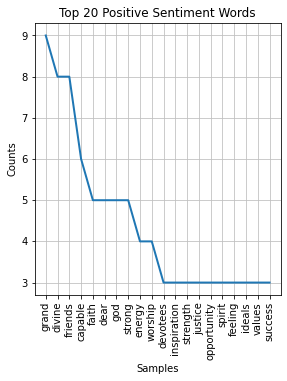

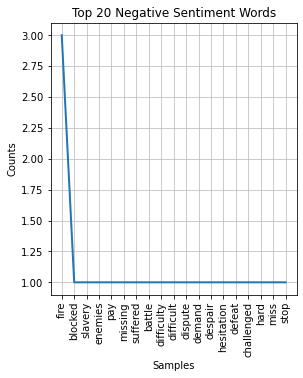

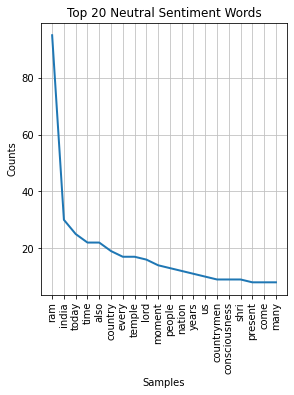

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_postive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [32]:
#top most 20 words
df_positive = pd.DataFrame(word_freq_postive.most_common(20), columns=['Word','Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word','Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word','Frequency'])

In [33]:
df_positive

,Word,Frequency
0,grand,9
1,divine,8
2,friends,8
3,capable,6
4,faith,5
5,dear,5
6,god,5
7,strong,5
8,energy,4
9,worship,4


In [34]:
df_negative

,Word,Frequency
0,fire,3
1,blocked,1
2,slavery,1
3,enemies,1
4,pay,1
5,missing,1
6,suffered,1
7,battle,1
8,difficulty,1
9,difficult,1


In [35]:
df_neutral

,Word,Frequency
0,ram,95
1,india,30
2,today,25
3,time,22
4,also,22
5,country,19
6,every,17
7,temple,17
8,lord,16
9,moment,14


In [155]:
fig_neutral = px.bar(df_neutral, x ='Word', y='Frequency', title="Top 20 neutral Sentiment Words")

fig_neutral.show()

# Preprocessed Method

In [156]:
from tqdm import tqdm

In [166]:
from tqdm import tqdm #combining all scale

preprocessed_reviews = []

for sentence in tqdm(sentences11):
    sentence = re.sub('[^a-zA-Z]',' ',sentence)

#for sentence in tqdm(df['review'].values): #
    #sentence = re.sub('[^a-zA-Z]',' ',sentence) #regularexpression only applicable small and caps letter remaing all replaced by space
    sentence = ' '.join(low.lower() for low in sentence.split() if low.lower() not in stopwords.words('english')) # all sentence concert into lower,
    preprocessed_reviews.append(sentence.strip())

100%|███████████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 388.86it/s]


In [167]:
preprocessed_reviews

['siyavar',
 'glory ramchandra',
 'jai siyavar ramchandra',
 'shraddha manch saints sages present every corner world',
 'corner',
 'connected',
 'ram devotees',
 'salutations',
 'ram',
 'ram',
 'today ram come',
 'centuries waiting ram arrived',
 'centuries unprecedented patience countless sacrifices renunciation penance lord ram come',
 'auspicious time',
 '',
 'countrymen',
 'many many congratulations',
 '',
 'bearing witness divine consciousness womb planet',
 'much appeared say',
 '',
 'throat',
 'blocked',
 'body',
 '',
 'mind also absorbed moment',
 'ramlala',
 'live tents',
 'ramlala divinely remain temple',
 'firmly believe',
 'immense faith formed felt ram devotees every corner country world',
 'supernatural',
 'moment',
 'holiest',
 'atmosphere atmosphere energy time lord',
 'shri ram',
 'blessed',
 'sun january brought wonderful aura',
 'january',
 'calendar',
 'wrote',
 'date',
 '',
 'origin new time cycle',
 'since bhoomi pujan ram mandir every day excitement enthusiasm in

# Feature Extraction
TF-IDF : Term Frequency - Inverse Documents Frequency

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(x).shape

(365, 680)

In [170]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,670,671,672,673,674,675,676,677,678,679
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
